# Predicting Thyroid Disease using Machine Learning

This notebook introduces some foundational machine learning and data science concepts by exploring the problem of obesity **classification**.

## 1. Problem Definition
Obesity is a global health problem with serious physical and mental consequences. Its prevalence is steadily increasing. necessitating new research to examine influencing factors and predict their occurrence 

## 2. Data
The data is sourced from [Kaggle](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels).

## 3. Evaluation
Our goal is to achieve 95% accuracy in predicting obesity levels based on eating habits and physical activities.

## 4. Obesity Levels Dictionary
1. **Gender:** Feature, Categorical, "Gender"
2. **Age:** Feature, Continuous, "Age"
3. **Height:** Feature, Continuous
4. **Weight:** Feature Continuous
5. **family_history_with_overweight:** Feature, Binary, " Has a family member suffered or suffers from overweiht? "
6. **FAVC:** Feature, Binary, " Do you eat high caloric food frequently? "
7. **FCVC:** Feature, Integer, " Do you usually eat vegetables in your meals? "
8. **NCP:** Feature, Continuous, " How many main meals do you have daily? "
9. **CAEC:** Feature, Categorical, " Do you eat any food between meals? "
10. **SMOKE:** Feature, Binary, " Do you smoke? "
11. **CH2O:** Feature, Continuous, " How much water do you drink daily? "
12. **SCC:** Feature, Binary, " Do you monitor the calories you eat daily? "
13. **FAF:** Feature, Continuous, " How often do you have physical activity? "
14. **TUE:** Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
15. **CALC:** Feature, Categorical, " How often do you drink alcohol? "
16. **MTRANS:** Feature, Categorical, " Which transportation do you usually use? "
17. **NObeyesdad:** Target, Categorical, "Obesity level"

In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.multiclass import unique_labels

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Fri May 31 06:34:07 2024


## 1. Load data

In [2]:
df = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 2. Data Exploration

### 2.1 Age Analysis with Respect to Obesity Levels

### Visualization

> The following graph illustrates the distribution of obesity levels by age

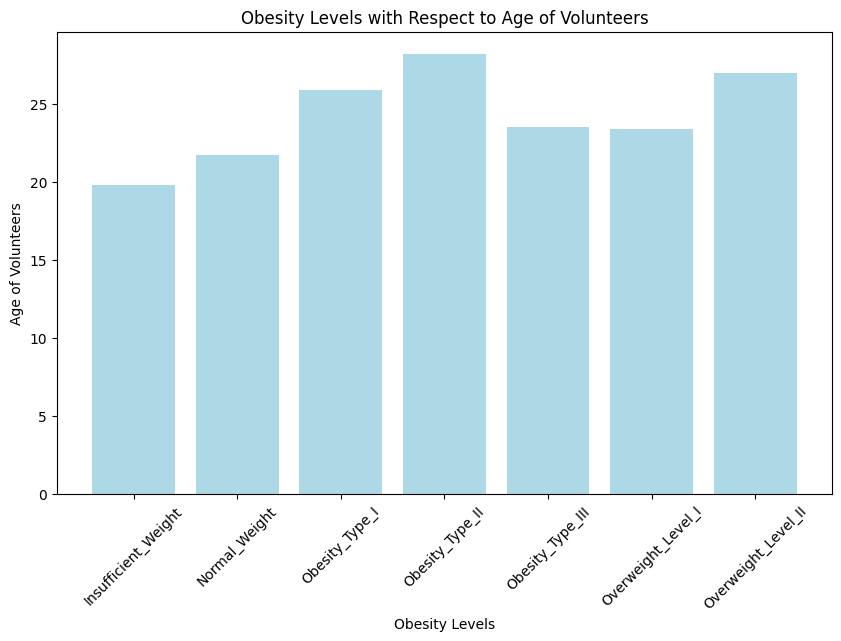

In [3]:
grouped_levels = df.groupby('NObeyesdad')['Age'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(grouped_levels['NObeyesdad'], grouped_levels['Age'], color='lightblue')

plt.title('Obesity Levels with Respect to Age of Volunteers')
plt.xlabel('Obesity Levels')
plt.ylabel('Age of Volunteers')
plt.xticks(rotation=45)
plt.show()

> Has we can see, the avarage age in the study is between 20 and 25 years old, and the most typical levels of obesity are **Obesity Type II** and **Overweight Level II**, wich is worrying   

### 2.2 Do People Who Smoke Also Drink Alcohol?

### Visualization

> The following graph illustrates the relationship between people who smoke and those who drink alcohol

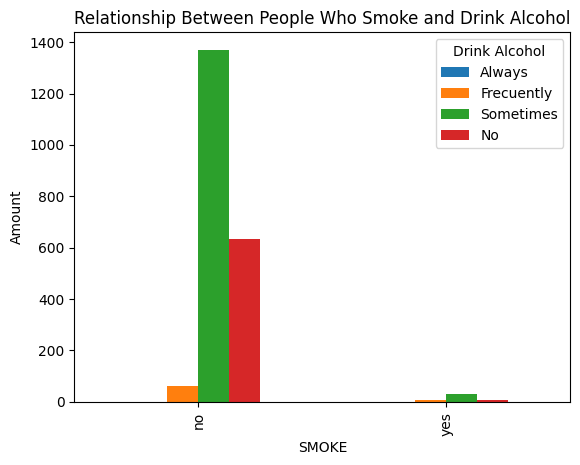

In [4]:
pd.crosstab(df.SMOKE, df.CALC).plot(kind='bar')

plt.title('Relationship Between People Who Smoke and Drink Alcohol')
plt.ylabel('Amount')
plt.legend(title= 'Drink Alcohol', labels = ['Always', 'Frecuently', 'Sometimes', 'No']);

> As we can see, most of the people who don't smoke have the habit of drinking alcohol, and only a small portion of them both smoke and drink alcohol. 

### 2.1 Relationship Between Use of Technological Devices and Obesity Levels

### Visualization

> The following graph illustrates the distribution of obesity levels and compares them with the use of technological devices by people

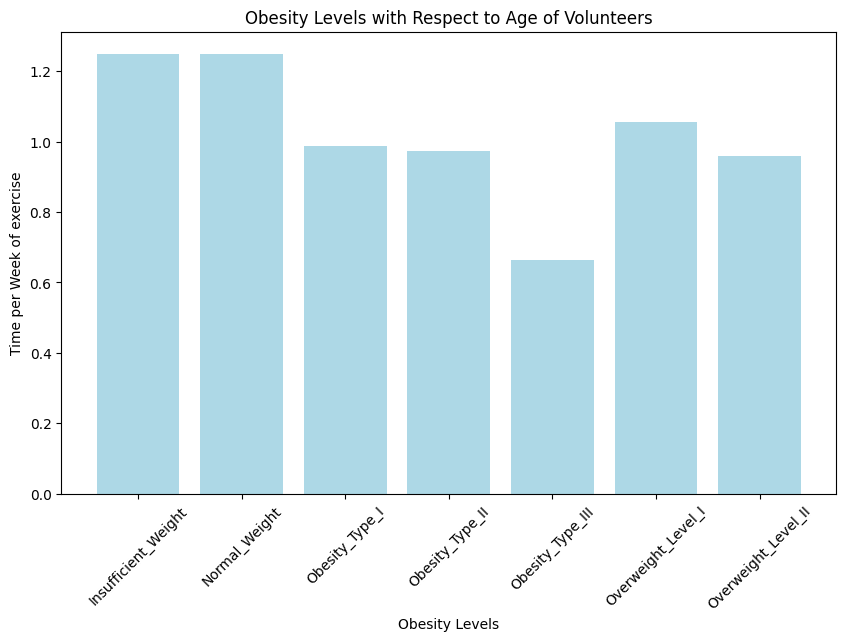

In [5]:
grouped_levels = df.groupby('NObeyesdad')['FAF'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(grouped_levels['NObeyesdad'], grouped_levels['FAF'], color='lightblue')

plt.title('Obesity Levels with Respect to Age of Volunteers')
plt.xlabel('Obesity Levels')
plt.ylabel('Time per Week of exercise')
plt.xticks(rotation=45)
plt.show()

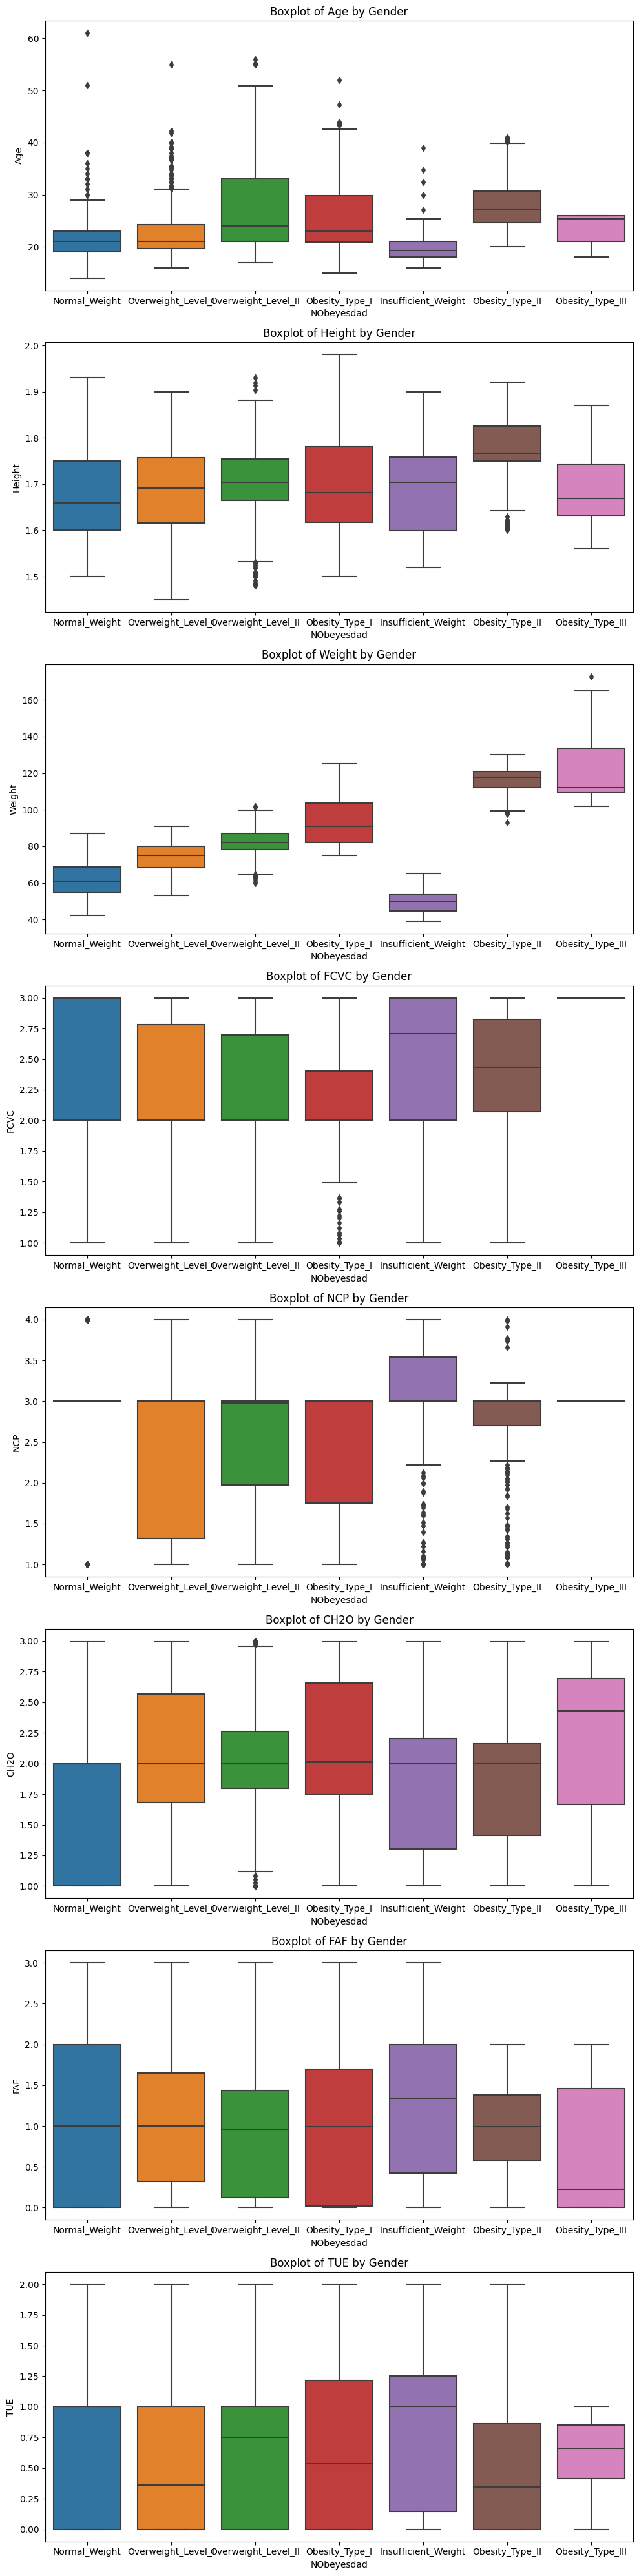

In [6]:
numeric_columns = df.select_dtypes(include='number').columns

num_plots = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))

if num_plots == 1:
    axes = [axes]

for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x='NObeyesdad', y=column, data=df, ax=ax)
    ax.set_xlabel('NObeyesdad')
    ax.set_ylabel(column)
    ax.set_title(f'Boxplot of {column} by Gender')

plt.tight_layout()
plt.show()

## 3. Data Proccesing

### 3.1 Handing Missing Values

In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

> In this dataset, there are no missing values, which simplifies the data preprocessing step

In [8]:
df_numeric = df.select_dtypes(include=np.number)

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

df[df_numeric.columns] = df_normalized

df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 3.2 Convert String to Categories

In [9]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2111 non-null   float64 
 1   Gender                          2111 non-null   category
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   CALC                            2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   SCC                             2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  family_history_with_overweight  2111 non-null   category
 12  FAF                 

### 3.3 Codifying Categorical Variables

In [10]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int8   
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int8   
 5   FAVC                            2111 non-null   int8   
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int8   
 9   SMOKE                           2111 non-null   int8   
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int8   
 12  FAF                             21

### 3.4 Correlation matrix
> Now that we have encoded our categorical variables, we can generate a correlation matrix to identify the impact that independent variables have on the dependent variable. 

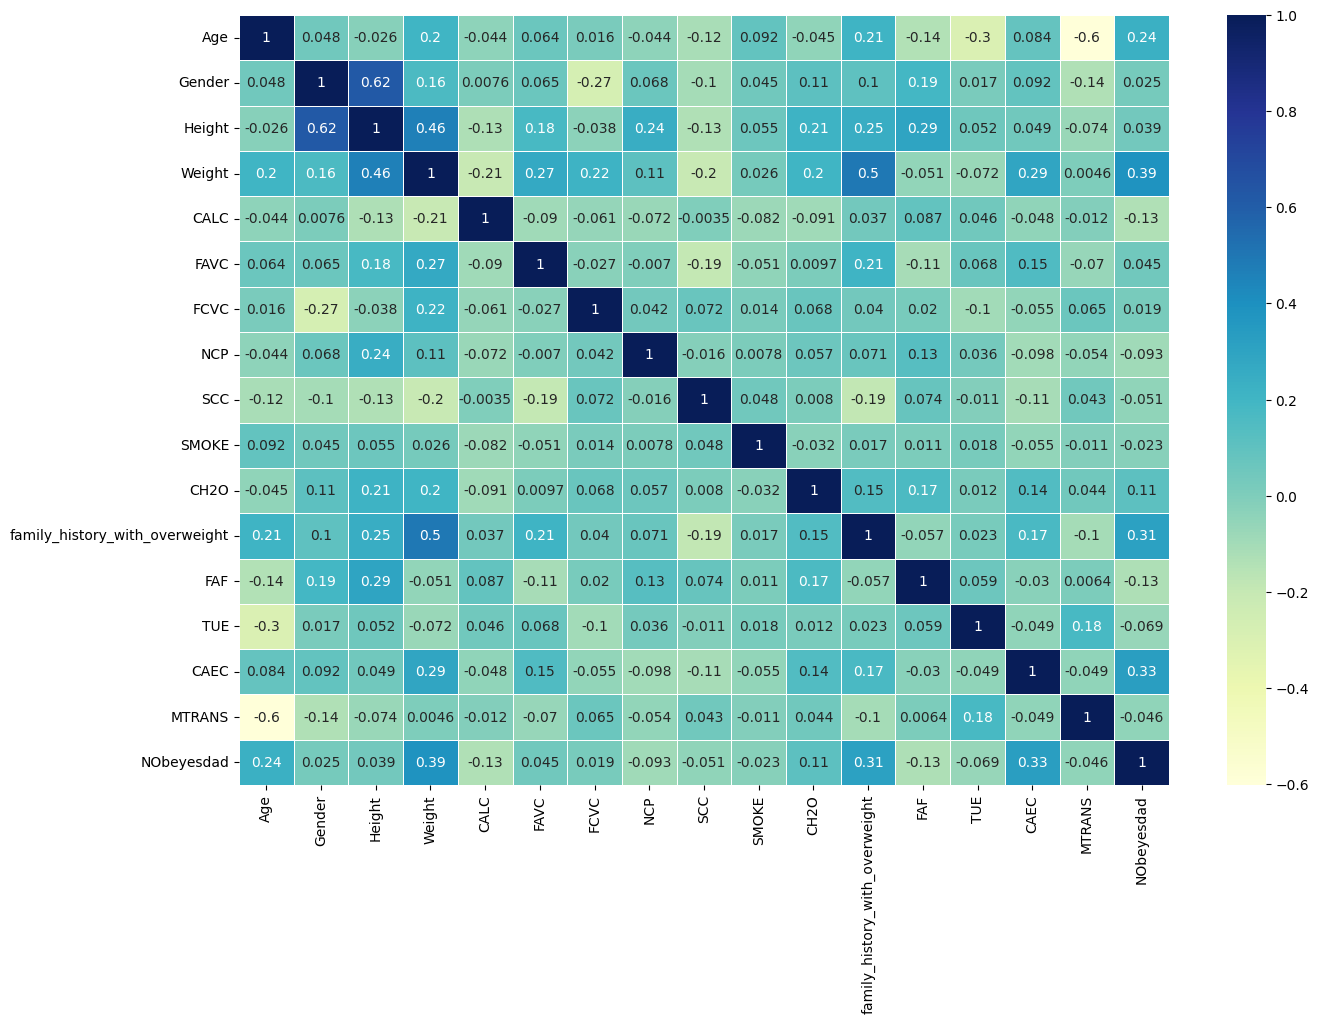

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           cmap='YlGnBu');

> As we can see, the independent variables that appear to have the greatest impact on the dependent variable are **Weight**, **Family History** and **CAEC**.

## 4. Modeling

In this project we are going to implement six different classification models:

1. **KNN (K-Nearest Neighbors)**
   * KNN is a simple and versatile algorithm for classification tasks
   * It can capture complex patterns in the data
2. **Logistic Regression**
   * Logistic Regression is a classic and widely used model for binary classification problems
   * It provides a probabilistic interpretation of the relationship between independent variables and the dependent variable
3. **Random Forest**
   * Random Forest is an ensemble algorithm that combines multiple decision trees to improve accuracy and reduce overfitting
   * It is robust against outliers and missing data
4. **Support Vector Machine (SVM)**
   * SVM has good generalization capabilities and is resistant to overfitting
5. **Decision Trees**
    * They can handle numerical and categorical data without extensive preprocessing
6. **XGBoost**
    * XGBoost is an optimized implementation of gradient-boosting algorithms
    * It provides high accuracy and speed in predictions
7. **Gaussian Process**
    * Gaussian Process provides a probabilistic approach to learning in kernel machines
    * It is useful for modeling uncertainties in predictions and works well with small datasets.
8. **Neural Net**
    * Neural Networks are powerful models capable of capturing complex patterns in data.
    * They are highly flexible and can be used for various types of classification tasks, particularly with large datasets.
9. **AdaBoost**
    * AdaBoost is an ensemble technique that combines multiple weak classifiers to form a strong classifier.
    * It focuses on misclassified instances and iteratively adjusts the weights to improve accuracy.
10. **Naive Bayes**
    * Naive Bayes is a probabilistic classifier based on Bayes' theorem.
    * It is simple, fast, and effective, especially for text classification and problems with high dimensionality.
11. **QDA (Quadratic Discriminant Analysis)** 
    * QDA models the data distribution for each class separately using a quadratic decision boundary.
    * It works well when the assumption of normally distributed data holds and can capture more complex class boundaries compared to Linear Discriminant Analysis (LDA). 

In [12]:
X = df.drop('NObeyesdad', axis=1) 
y = df.NObeyesdad

X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2,
                                                    random_state=42)

### 4.1 Model Comparison

In [13]:
%%time
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Support Vector Machine": SVC(),
          "Decision Trees": DecisionTreeClassifier(),
          "XGBoost": GradientBoostingClassifier(),
          "Gaussian Process": GaussianProcessClassifier(),
          "Neural Net": MLPClassifier(),
          "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
          "Naive Bayes": GaussianNB(),
          "QDA": QuadraticDiscriminantAnalysis()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = round(model.score(X_test, y_test),4)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

scores_df = pd.DataFrame(list(model_scores.items()), columns=['Modelo', 'Precisión'])

from tabulate import tabulate
print(tabulate(scores_df, headers='keys', tablefmt='pretty', showindex=False))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


+------------------------+-----------+
|         Modelo         | Precisión |
+------------------------+-----------+
|          KNN           |  0.7967   |
|  Logistic Regression   |  0.7329   |
|     Random Forest      |  0.9504   |
| Support Vector Machine |  0.6879   |
|     Decision Trees     |  0.9456   |
|        XGBoost         |  0.9527   |
|    Gaussian Process    |  0.7589   |
|       Neural Net       |  0.8676   |
|        AdaBoost        |  0.5083   |
|      Naive Bayes       |  0.6407   |
|          QDA           |  0.8345   |
+------------------------+-----------+
CPU times: user 58.1 s, sys: 41.3 s, total: 1min 39s
Wall time: 29.6 s


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


> Now, we have six different classifier, between these we gonna select three better to tuning, this models were **Random Forest**, **Decision Trees**, **XGBoost**, **Neural Net** and **QDA**

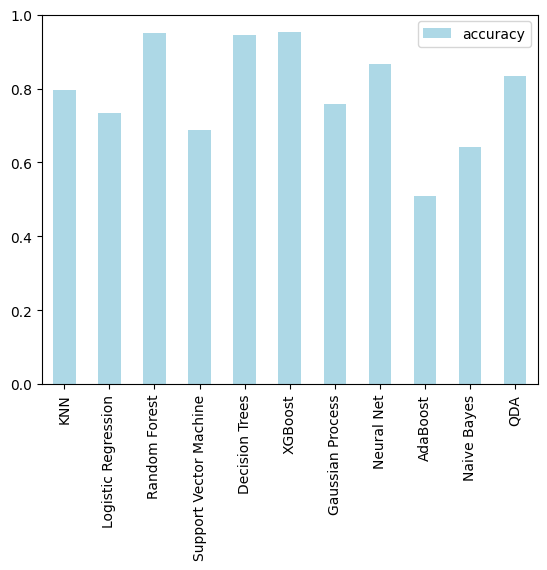

In [14]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='lightblue');

### 4.2 Hyperparameter tuning (RadomizedSearchCV) and cross-validation

In [15]:
# Different RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10, 20, 30],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "bootstrap": [True, False]
}

# Different DecisionTreeClassifier hyperparameters
dt_grid = {
    "max_depth": [None, 2, 3, 5, 10, 20],
    "min_samples_split": np.arange(2, 15, 2),
    "min_samples_leaf": np.arange(1, 50, 5),
    "criterion": ["gini", "entropy"]
}

# Different XGBoostClassifier hyperparameters
gbc_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Different MLPClassifier hyperparameters
mlp_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50,50), (100,50), (100,100)],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd", "lbfgs"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "max_iter": [200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000]
}

# Different QuadraticDiscriminantAnalysis hyperparameters
qda_grid = {
    "reg_param": [0.0, 0.1, 0.2, 0.5, 0.7, 1.0],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1]
}

In [16]:
%%time
# Configuration of  RandomizedSearchCV to RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1)

# Configuration of  RandomizedSearchCV to DecisionTreeClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1)

# Configuration of  RandomizedSearchCV to XGBoostClassifier
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                            param_distributions=gbc_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True,
                            n_jobs=-1)

# Configuration of  RandomizedSearchCV to NeutalNet
rs_mlp = RandomizedSearchCV(MLPClassifier(),
                           param_distributions=mlp_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1)

#Configuration of  RandomizedSearchCV to QDA
rs_qda = RandomizedSearchCV(QuadraticDiscriminantAnalysis(),
                            param_distributions=qda_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True,
                            n_jobs=-1)

# Setup random seed
np.random.seed(42)
rs_rf.fit(X_train, y_train);
rs_dt.fit(X_train, y_train);
rs_gbc.fit(X_train, y_train);
rs_mlp.fit(X_train, y_train);
rs_qda.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/disc

CPU times: user 38.5 s, sys: 23.2 s, total: 1min 1s
Wall time: 6min 44s


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/conda/lib/python3.10/site-packages/skl

In [17]:
np.random.seed(42)
scores = {
    "Random Forest": rs_rf.best_estimator_.score(X_test, y_test),
    "Decision Tree": rs_dt.best_estimator_.score(X_test, y_test),
    "Gradient Boosting": rs_gbc.best_estimator_.score(X_test, y_test),
    "Neural Net": rs_mlp.best_estimator_.score(X_test, y_test),
    "QDA": rs_qda.best_estimator_.score(X_test, y_test),
}

table = []
for model, score in scores.items():
    table.append([model, score])

print(tabulate(table, headers=["Model", "Score"], tablefmt="pretty"))

+-------------------+--------------------+
|       Model       |       Score        |
+-------------------+--------------------+
|   Random Forest   | 0.9432624113475178 |
|   Decision Tree   | 0.9598108747044918 |
| Gradient Boosting | 0.9645390070921985 |
|    Neural Net     | 0.966903073286052  |
|        QDA        | 0.607565011820331  |
+-------------------+--------------------+


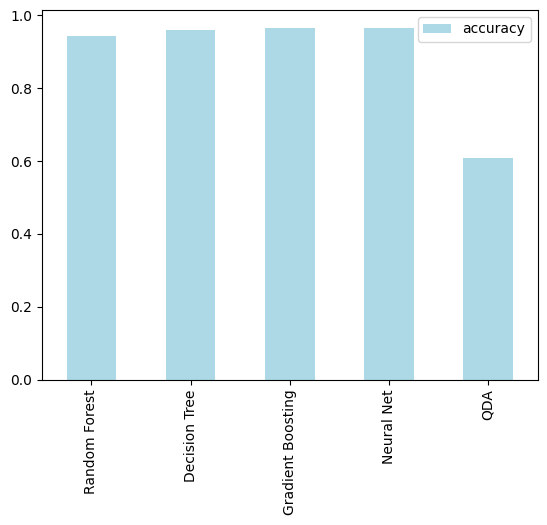

In [18]:
model_compare = pd.DataFrame(scores, index=['accuracy'])
model_compare.T.plot.bar(color='lightblue');

> Now, we really sure that the best model is Neural Net, therefore, we tuning the model with more iterations in RandomizedSearchCV to see if this became better

In [19]:
%%time

# Configuration of RandomizedSearchCV to NeutalNet
gs_mlp = RandomizedSearchCV(MLPClassifier(),
                           param_distributions=mlp_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True,
                           n_jobs=-1)

# Setup random seed
np.random.seed(42)
gs_mlp.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

CPU times: user 1min 8s, sys: 59.6 s, total: 2min 8s
Wall time: 18min 49s


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
best_mlp_score = gs_mlp.best_score_
best_mlp_model = gs_mlp.best_estimator_

print(f"Best score to Neural Net: {best_mlp_score}")
print(f"Best modelo to Neural Net: {best_mlp_model}")


Best score to Neural Net: 0.9686109599143153
Best modelo to Neural Net: MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(100, 100),
              learning_rate='adaptive', max_iter=800, solver='lbfgs')


In [21]:
model = MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=4000)

model.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=4000)

## Evaluation a classification model 
* ROC curve and AUC score - [`RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) 
     `sklearn.metrics.RocCurveDisplay()`.
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

### ROC Curve and AUC Scores

<Figure size 800x600 with 0 Axes>

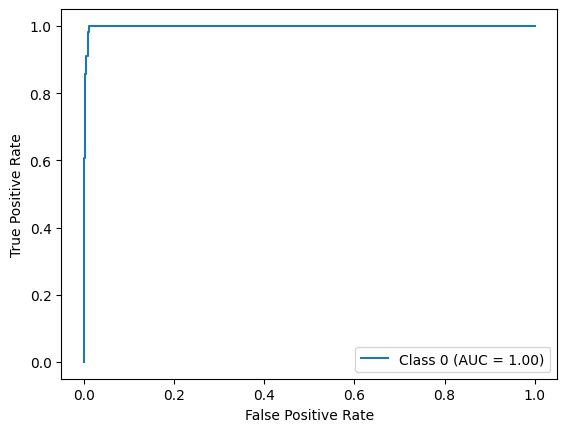

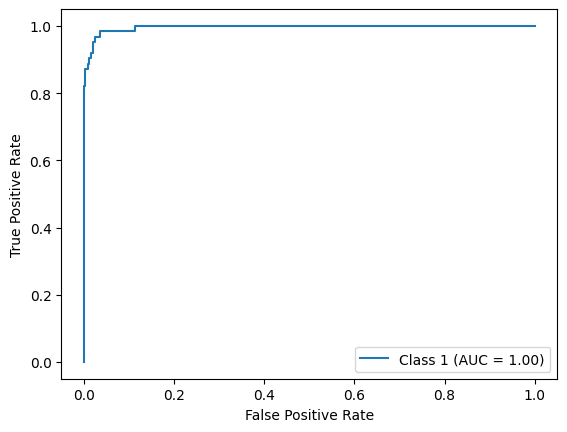

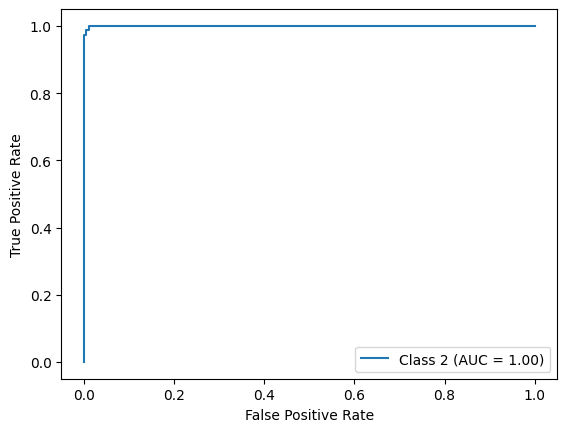

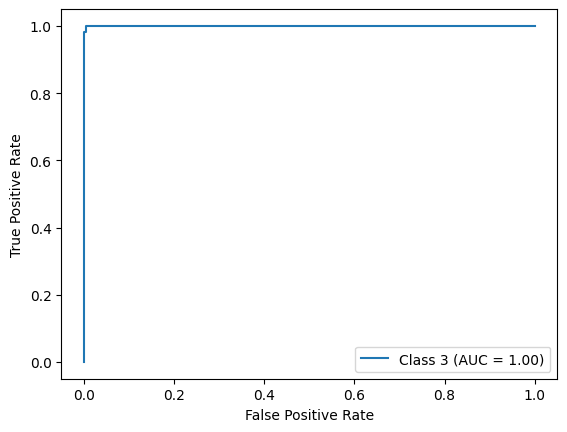

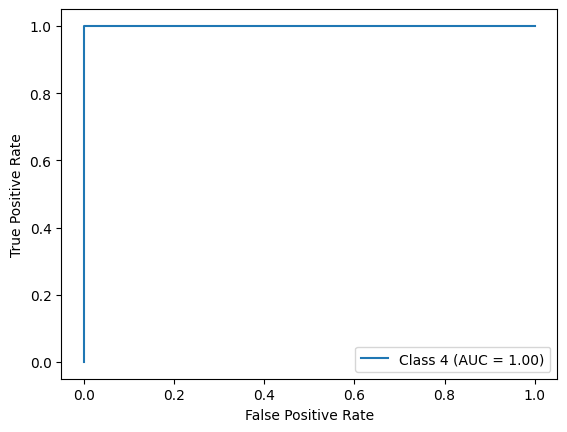

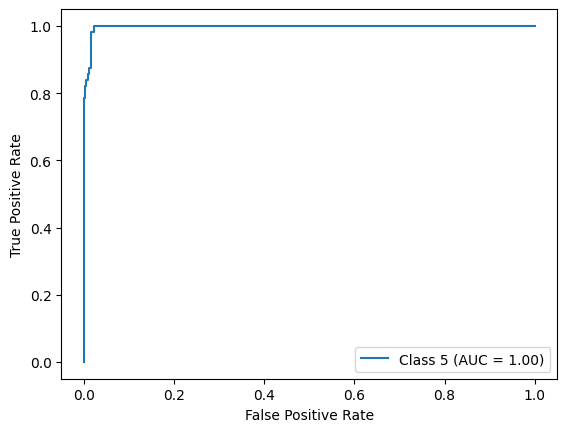

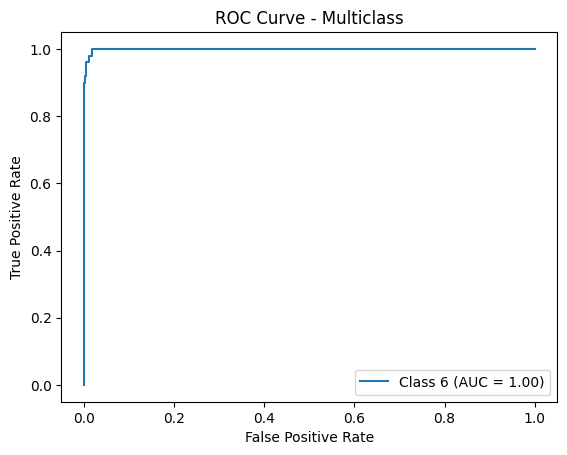

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# from_estimator() = use a model to plot ROC curve on data
y_test_bin = label_binarize(y_test, classes=model.classes_)

y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(len(model.classes_)):
    display = RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {model.classes_[i]}')
    display.plot()

plt.title('ROC Curve - Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

> An AUC (Area Under the Curve) of 1.0 indicates that the model has perfect performance in distinguishing between positive and negative classes. This means that the model correctly classifies all instances without making any errors

### Confusion matrix

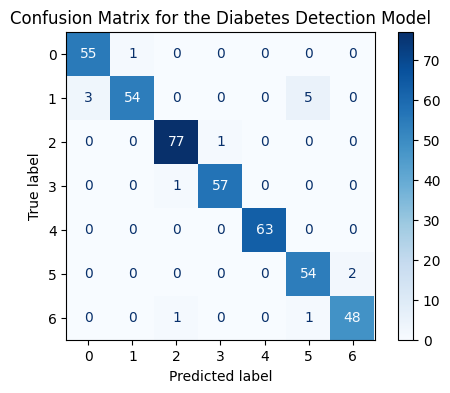

In [23]:
y_preds = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
class_names = unique_labels(y_test, y_preds)  # Get unique class labels

# Change figure size and increase dpi for better resolution
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

# Choose a colormap for visualization (e.g., 'viridis', 'plasma', 'coolwarm')
cmap = 'Blues'

# Create ConfusionMatrixDisplay object (passing class labels)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)

# Customize color scale using the "cmap" parameter
display.plot(ax=ax, cmap=cmap)

# Set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# Remove gridlines
ax.grid(False)  # Turn off gridlines

plt.show()

### Classification report

In [24]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.98      0.87      0.92        62
           2       0.97      0.99      0.98        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.90      0.96      0.93        56
           6       0.96      0.96      0.96        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



### Cross validation metrics
> The previous results were very good, which raises the question of whether the model might be overfitted. Therefore, an analysis of the metrics will be performed using cross-validation to obtain a more robust value.

In [25]:
# Cross-validated accuracy score
cv_acc = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy") # accuracy as scoring
cv_acc = np.mean(cv_acc)
cv_acc

0.944175545920025

In [26]:
# Cross-validated precision score

scorer = make_scorer(precision_score, average='micro')

cv_precision = cross_val_score(model,
                               X,
                               y, 
                               cv=5,
                               scoring=scorer)

cv_precision = np.mean(cv_precision)
cv_precision

0.9446483591587957

In [27]:
# Cross-validated recall score
scorer = make_scorer(recall_score, average='micro')

cv_recall = cross_val_score(model, X, y, cv=10, scoring=scorer)

cv_recall = np.mean(cv_recall)
cv_recall

0.9593110077796656

In [28]:
# Cross-validated F1 score
scorer = make_scorer(f1_score, average='micro')

cv_f1 = cross_val_score(model, X, y, cv=10, scoring=scorer)

cv_f1 = np.mean(cv_f1)
cv_f1

0.9560046499150496

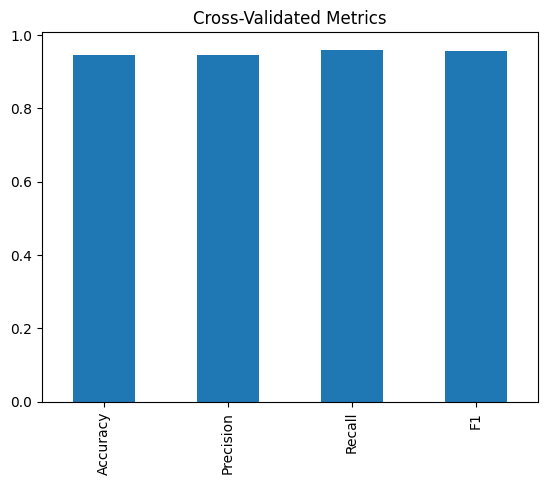

In [29]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Conclusions

> In conclusion, we successfully designed an optimal **Neural Net model**, achieving a **accuracy of 95%** in cross-validation. This indicates a high level of accuracy when applied in real-world scenarios. 